In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston

In [5]:
# understanding the dataset 
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# access data attributes  
dataset = boston.data
for name, index in enumerate(boston.feature_names):
    print(index, name )

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [7]:
# reshaping the datas
data = dataset[:,12].reshape(-1,1)
#shapeof the dataset
np.shape(dataset)

(506, 13)

In [8]:
# target value 
target = boston.target.reshape(-1,1)
# shape of target
np.shape(target)

(506, 1)

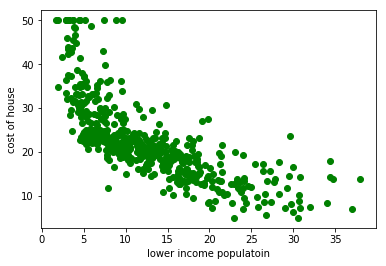

In [24]:
# ensuring that the matploitlib is working inside the notebook 
%matplotlib inline
plt.scatter(data , target , color='green')
plt.xlabel('lower income populatoin')
plt.ylabel('cost of house')
plt.show()

In [9]:
# fitting the linear regression model to the dataset  
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
# Predicting the results
pred = regressor.predict(data)

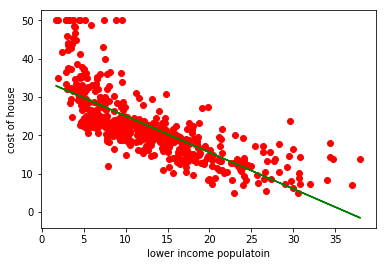

In [11]:
# ensuring that the matploitlib is working inside the notebook 
%matplotlib inline
plt.scatter(data , target , color='red')
plt.plot(data , pred , color='green')
plt.xlabel('lower income populatoin')
plt.ylabel('cost of house')
plt.show()

In [12]:
# fitting the lasso regression model to the dataset  
from sklearn.linear_model import Lasso
reg_l = Lasso()
reg_l.fit(data, target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
# Predicting the results
l_pred = reg_l.predict(data)

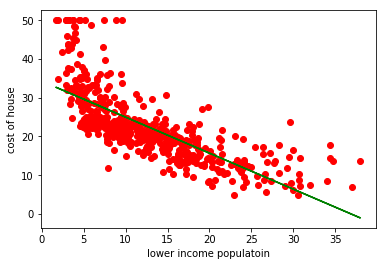

In [14]:
# ensuring that the matploitlib is working inside the notebook 
%matplotlib inline
plt.scatter(data , target , color='red')
plt.plot(data , l_pred , color='green')
plt.xlabel('lower income populatoin')
plt.ylabel('cost of house')
plt.show()

In [15]:
# fitting the ridge regression model to the dataset  
from sklearn.linear_model import Ridge
reg_r = Lasso()
reg_r.fit(data, target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
# Predicting the results
r_pred = reg_l.predict(data)

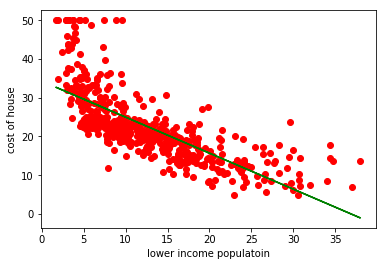

In [17]:
# ensuring that the matploitlib is working inside the notebook 
%matplotlib inline
plt.scatter(data , target , color='red')
plt.plot(data , r_pred , color='green')
plt.xlabel('lower income populatoin')
plt.ylabel('cost of house')
plt.show()

In [18]:
# cicumventing curve issue using polynomial model 
from sklearn.preprocessing import PolynomialFeatures

# to allow merging of models 
from sklearn.pipeline import make_pipeline


In [31]:
model = make_pipeline( PolynomialFeatures(5), regressor)

In [32]:
model.fit(data, target)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [33]:
# Predicting the results
p_pred = model.predict(data)

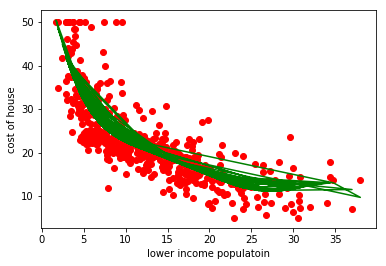

In [34]:
# ensuring that the matploitlib is working inside the notebook 
%matplotlib inline
plt.scatter(data , target , color='red')
plt.plot(data , p_pred , color='green')
plt.xlabel('lower income populatoin')
plt.ylabel('cost of house')
plt.show()

In [35]:
# r_2 metric
from sklearn.metrics import r2_score

In [36]:
#predict
r2_score(p_pred,target)

0.5330569921137035